In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [38]:
# Defining the input variables
memory_usage = ctrl.Antecedent(np.arange(0, 100, 1), 'memory_usage')
processor_load = ctrl.Antecedent(np.arange(0, 100, 1), 'processor_load')
output_bandwidth = ctrl.Antecedent(np.arange(0, 100, 1), 'output_bandwidth')
latency = ctrl.Antecedent(np.arange(0, 1000, 1), 'latency')
#input_network_throughput = ctrl.Antecedent(np.arange(0, 101, 1), 'input_network_throughput')
#output_network_throughput = ctrl.Antecedent(np.arange(0, 101, 1), 'output_network_throughput')


# Defining the output variable
clp_variation = ctrl.Consequent(np.arange(-1, 1.0, 0.01), 'clp_variation')

# Defining the membership functions for the input variables
# Note: The membership intervals and the terms used may vary depending on the specific problem
memory_usage.automf(3, names=['low', 'medium', 'high'])
processor_load.automf(3, names=['low', 'medium', 'high'])
#input_network_throughput.automf(3, names=['low', 'medium', 'high'])
#output_network_throughput.automf(3, names=['low', 'medium', 'high'])
output_bandwidth.automf(3, names=['low', 'medium', 'high'])
latency.automf(3, names=['low', 'medium', 'high'])

# Now defining the membership functions for the output variable
clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -0.5, 0  ])
clp_variation['maintain'] = fuzz.trimf(clp_variation.universe, [-0.5, 0   , 0.5])
clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0   , 0.5 , 1  ])

In [39]:
# Now defining the membership functions for the output variable
clp_variation['decrease'] = fuzz.trapmf(clp_variation.universe, [-2, -1, -0.5, 0])
clp_variation['maintain'] = fuzz.trimf(clp_variation.universe, [-0.5, 0, 0.5])
clp_variation['increase'] = fuzz.trapmf(clp_variation.universe, [0, 0.5, 1, 2])


# Now defining the membership functions for the output variable
clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1, -1, 0])
clp_variation['maintain'] = fuzz.trimf(clp_variation.universe, [-1, 0, 1])
clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0, 1, 1])

# Now defining the membership functions for the output variable
#clp_variation.automf(3, names=['decrease', 'maintain', 'increase'])


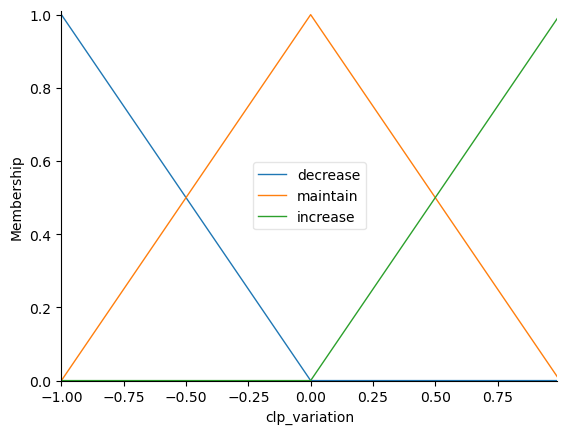

In [55]:
# Taking a look at the membership functions
#memory_usage.view()
clp_variation.view()


0.028037383177570093


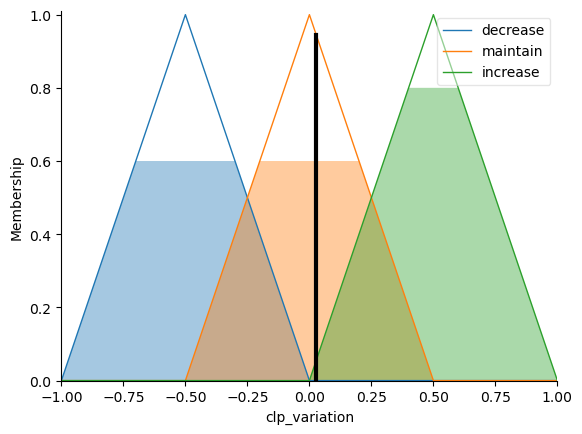

In [5]:
# Defining the rules
rule1a = ctrl.Rule(memory_usage['high'] | processor_load['high'], clp_variation['decrease'])
rule1a.weight = 3
rule1b = ctrl.Rule(memory_usage['low'] | processor_load['low'] , clp_variation['increase'])
rule1b.weight = 3     
rule1c = ctrl.Rule(memory_usage['low'] & processor_load['low'], clp_variation['increase'])
rule1c.weight = 3
rule1d = ctrl.Rule(memory_usage['medium'] & processor_load['medium'], clp_variation['maintain'])
rule1c.weight = 3

rule2a = ctrl.Rule(latency['high'] , clp_variation['increase'])
rule2a.weight = 2
rule2b = ctrl.Rule(latency['low'], clp_variation['decrease'])
rule2b.weight = 2
rule2c = ctrl.Rule(latency['medium'], clp_variation['maintain'])
rule2c.weight = 2

rule3a = ctrl.Rule(output_bandwidth['low'] , clp_variation['decrease'])
rule3a.weight = 1
rule3b = ctrl.Rule(output_bandwidth['high'], clp_variation['increase'])
rule3b.weight = 1
rule3c = ctrl.Rule(output_bandwidth['medium'], clp_variation['maintain'])
rule3c.weight = 1

# Creating the control system
clp_ctrl = ctrl.ControlSystem([rule1a, rule1b, rule1c, rule1d, rule2a, rule2b, rule2c, rule3a, rule3b, rule3c])


# Creating the simulator
clp_simulator = ctrl.ControlSystemSimulation(clp_ctrl)


# Updating the variables
clp_simulator.input['memory_usage'] = 10
clp_simulator.input['processor_load'] = 10
#clp_simulator.input['input_network_throughput'] = 50
#clp_simulator.input['output_network_throughput'] = 40
clp_simulator.input['output_bandwidth'] = 30
clp_simulator.input['latency'] = 200


# Executing the simulation
clp_simulator.compute()

print(clp_simulator.output['clp_variation'])


# Checking the simulation result, and what it suggests
clp_variation.view(sim=clp_simulator)

Example of how to create an "over time" FIS:

In [26]:
"""
# Assume inputs_over_time is a list of dictionaries, where each dictionary contains the input values for one time step
inputs_over_time = [{'memory_usage': 70, 'processor_load': 60, 'input_network_throughput': 50, 'output_bandwidth': 30, 'latency': 200}, ...]

for inputs in inputs_over_time:
    # Update variables
    for variable_name, value in inputs.items():
        clp_simulator.input[variable_name] = value

    # Run simulation
    clp_simulator.compute()

    print(clp_simulator.output['clp_variation'])

"""

"\n# Assume inputs_over_time is a list of dictionaries, where each dictionary contains the input values for one time step\ninputs_over_time = [{'memory_usage': 70, 'processor_load': 60, 'input_network_throughput': 50, 'output_bandwidth': 30, 'latency': 200}, ...]\n\nfor inputs in inputs_over_time:\n    # Update variables\n    for variable_name, value in inputs.items():\n        clp_simulator.input[variable_name] = value\n\n    # Run simulation\n    clp_simulator.compute()\n\n    print(clp_simulator.output['clp_variation'])\n\n"